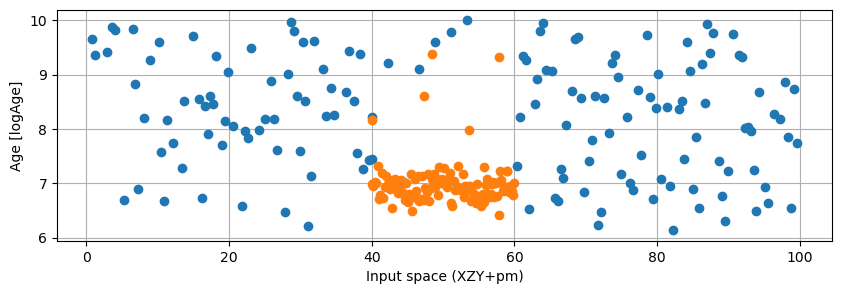

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranges for low and high variance data
low_var_range = (40, 60)
high_var_range1 = (0, 40)
high_var_range2 = (60, 100)

# Generate low variance data
low_var_x = np.linspace(low_var_range[0], low_var_range[1], 100)
low_var_y = np.random.normal(loc=6.9, scale=0.2, size=low_var_x.shape)
cut = (low_var_y > 6) & (low_var_y < 10)
low_var_y = low_var_y[cut]
low_var_x = low_var_x[cut]

low_var_x_ol = np.linspace(low_var_range[0], low_var_range[1], 20)
low_var_y_ol = np.random.normal(loc=6.9, scale=2.5, size=low_var_x_ol.shape)
cut = (low_var_y_ol > 6) & (low_var_y_ol < 10)
low_var_y_ol = low_var_y_ol[cut]
low_var_x_ol = low_var_x_ol[cut]

# Generate high variance data
high_var_x1 = np.linspace(high_var_range1[0], high_var_range1[1], 100)
high_var_y1 = np.random.normal(loc=8.5, scale=1.5, size=high_var_x1.shape)
cut = (high_var_y1 > 6) & (high_var_y1 < 10)
high_var_y1 = high_var_y1[cut]
high_var_x1 = high_var_x1[cut]

high_var_x2 = np.linspace(high_var_range2[0], high_var_range2[1], 100)
high_var_y2 = np.random.normal(loc=8.5, scale=1.5, size=high_var_x2.shape)
cut = (high_var_y2 > 6) & (high_var_y2 < 10)
high_var_y2 = high_var_y2[cut]
high_var_x2 = high_var_x2[cut]

high_var_x3 = np.linspace(low_var_range[0], low_var_range[1], 10)
high_var_y3 = np.random.normal(loc=8.5, scale=1.5, size=high_var_x3.shape)
cut = (high_var_y3 > 6) & (high_var_y3 < 10)
high_var_x3 = high_var_x3[cut]
high_var_y3 = high_var_y3[cut]


y = np.concatenate([low_var_y, low_var_y_ol, high_var_y1, high_var_y2, high_var_y3])
X = np.concatenate([low_var_x, low_var_x_ol, high_var_x1, high_var_x2, high_var_x3]) 

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(high_var_x1, high_var_y1, 'o', color='tab:blue', label='Field')
plt.plot(high_var_x2, high_var_y2, 'o', color='tab:blue')
plt.plot(high_var_x3, high_var_y3, 'o', color='tab:blue')
plt.plot(low_var_x, low_var_y, 'o', color='tab:orange', label='Cluster data')
plt.plot(low_var_x_ol, low_var_y_ol, 'o', color='tab:orange')

plt.xlabel('Input space (XZY+pm)')
plt.ylabel('Age [logAge]')

# plt.title('1D Data with Low Variance in a Specific Range and High Variance Outside')
# plt.legend(frameon=False)
plt.grid(True)
# plt.show()
plt.savefig('/Users/ratzenboe/Desktop/retreat/data_x.png', bbox_inches='tight')

In [65]:
# Fit Gaussian process model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Define the kernel
kernel = 7.0 * RBF(length_scale=2.0, length_scale_bounds=(0.5, 3.0)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e0))
# Fit model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X.reshape(-1, 1), y)

/Users/ratzenboe/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 3.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=2.65**2 * RBF(length_scale=2) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10)

In [66]:
# Predict
x_pred = np.linspace(0, 100, 1000)
y_pred, sigma = gp.predict(x_pred.reshape(-1, 1), return_std=True)

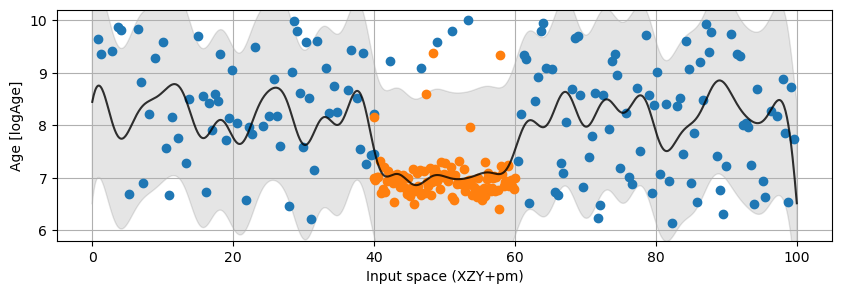

In [116]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(high_var_x1, high_var_y1, 'o', color='tab:blue', label='Field')
plt.plot(high_var_x2, high_var_y2, 'o', color='tab:blue')
plt.plot(high_var_x3, high_var_y3, 'o', color='tab:blue')

plt.plot(low_var_x, low_var_y, 'o', color='tab:orange', label='Cluster data')
plt.plot(low_var_x_ol, low_var_y_ol, 'o', color='tab:orange')


plt.grid(True)
plt.xlabel('Input space (XZY+pm)')
plt.ylabel('Age [logAge]')
plt.ylim(5.8, 10.2)
plt.plot(x_pred, y_pred, color='black', label='GP prediction', alpha=0.8)
plt.fill_between(x_pred, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.1, color='black')
plt.savefig('/Users/ratzenboe/Desktop/retreat/data_x_gp.png', bbox_inches='tight')

In [78]:
import sys
sys.path.append('/Users/ratzenboe/Documents/work/code/DMGPE/')

In [79]:
from dmogpe import DeepMixtureGPE

In [97]:
m = DeepMixtureGPE(
    n_experts=3,
    sparse_gp=False, 
    fix_ind_pnts=True, 
    initial_clustering='GMM', 
    random_state=12
)

In [98]:
%%time
m.fit(X.reshape(-1,1), y.reshape(-1,1), mode='CCR', verbose=0)

 /Users/ratzenboe/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning:Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Optimization restart 1/2, f = 102.16357681269864
Optimization restart 2/2, f = 102.1635745802835
Optimization restart 1/2, f = 96.48782048250695
Optimization restart 2/2, f = 96.48782035780349
Optimization restart 1/2, f = 188.0779372166196
Optimization restart 2/2, f = 188.07793721403942
CPU times: user 4.49 s, sys: 4.34 s, total: 8.83 s
Wall time: 2.2 s


In [99]:
m.scoring(X.reshape(-1,1), y.reshape(-1,1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

R^2. Hard_pred: 36.30 %. Soft_pred: 34.58 %.
RMSE. Hard_pred: 0.7894. Soft_pred: 0.8000.


In [106]:
y_hard, y_hard_var = m.hard_prediction(x_pred.reshape(-1,1), return_variance=True)
y_soft, y_soft_var = m.soft_prediction(x_pred.reshape(-1,1), return_variance=True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


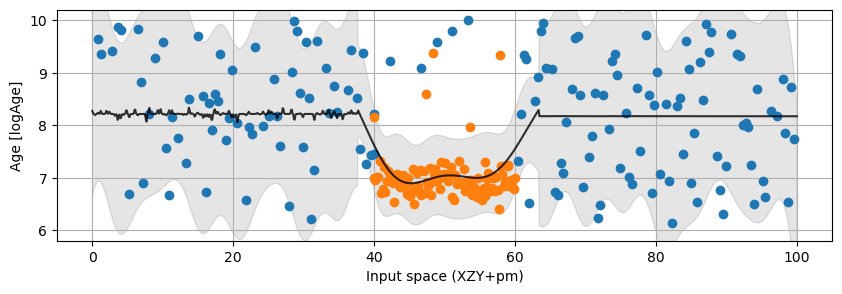

In [117]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(high_var_x1, high_var_y1, 'o', color='tab:blue', label='Field')
plt.plot(high_var_x2, high_var_y2, 'o', color='tab:blue')
plt.plot(high_var_x3, high_var_y3, 'o', color='tab:blue')

plt.plot(low_var_x, low_var_y, 'o', color='tab:orange', label='Cluster data')
plt.plot(low_var_x_ol, low_var_y_ol, 'o', color='tab:orange')


plt.grid(True)
plt.xlabel('Input space (XZY+pm)')
plt.ylabel('Age [logAge]')
plt.ylim(5.8, 10.2)
plt.plot(x_pred, y_hard, color='black', label='GP prediction', alpha=0.8)
plt.fill_between(x_pred, y_pred - 1.96 * y_hard_var, y_pred + 1.96 * y_hard_var, alpha=0.1, color='black')
plt.savefig('/Users/ratzenboe/Desktop/retreat/data_x_dmogpe.png', bbox_inches='tight')